### This is a notebook for utilizing SlideRule to pull ICEsat-2 and GEDI data, satellite laser altimeter data commonly used to measure elevation

https://slideruleearth.io/web/rtd/ (SlideRule uses h5coro for cloud-optimized h5 reading https://github.com/SlideRuleEarth/h5coro)

https://icesat-2.gsfc.nasa.gov/
https://gedi.umd.edu/

In [ ]:
# sliderule installation:
# https://slideruleearth.io/web/rtd/getting_started/Install.html
#!pip install sliderule

In [3]:
import geopandas as gpd
from sliderule import icesat2, gedi, earthdata
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import box

In [2]:
# initialize the sliderule APIs for ICESat-2 and GEDI
# also set a resource limit
icesat2.init("slideruleearth.io")
gedi.init("slideruleearth.io")
earthdata.set_max_resources(500)

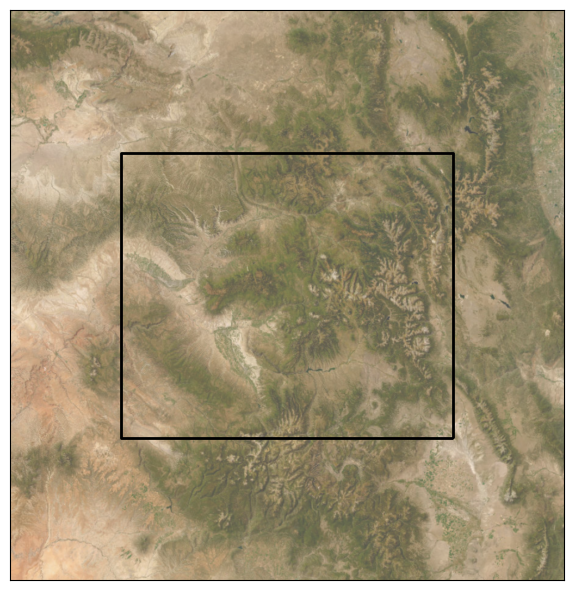

In [64]:
# now let's define a site to use as an example, let's pick somewhere in the rockies for fun
fig, ax = plt.subplots(figsize=(6, 6))
shapely_bbox = box(-109,38,-106,40)
gpd.GeoSeries(shapely_bbox).set_crs(epsg=4326).plot(ax=ax, facecolor='none', linewidth=2)
ax.set_xlim(-110,-105)
ax.set_ylim(37,41)
ctx.add_basemap(ax, crs=4326, source=ctx.providers.Esri.WorldImagery, alpha=0.7, attribution=False)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()

In [59]:
# search for ICESsat-2 ATL06 granules with sliderule
# let's define an arbitrary time window for the search so we don't get too many results
start = '2020-04-01T00:00:00Z'
end = '2020-04-07T00:00:00Z'
# let's convert our bbox to the format that sliderule expects
bbox_coords = [{'lon': lon, 'lat': lat} for lon, lat in shapely_bbox.exterior.coords]
is2_granule_search = earthdata.cmr(
    short_name='ATL06',
    return_metadata=True,
    polygon=bbox_coords,
    time_start=start,
    time_end=end
)
atl06_granules = gpd.GeoDataFrame(is2_granule_search[1], index=is2_granule_search[0])

In [60]:
atl06_granules

,geometry,title,collection_concept_id,time_start,time_end,time_updated,granule_size
ATL06_20200405085928_01500706_006_03.h5,"MULTIPOLYGON (((-103.74158 59.53098, -103.9621...",ATL06_20200405085928_01500706_006_03.h5,C2670138092-NSIDC_CPRD,2020-04-05 08:59:27.815,2020-04-05 09:07:35.511,2023-04-28 22:13:02.644,127686616.0
ATL06_20200406204338_01730702_006_02.h5,"MULTIPOLYGON (((-109.81765 59.54072, -110.0427...",ATL06_20200406204338_01730702_006_02.h5,C2670138092-NSIDC_CPRD,2020-04-06 20:43:38.502,2020-04-06 20:52:08.663,2023-04-28 22:24:38.414,98691556.0


In [61]:
# now let's do the same thing for GEDI L2A granules
gedi_granule_search = earthdata.cmr(
    short_name='GEDI02_A',
    polygon=bbox_coords,
    time_start=start,
    time_end=end,
    return_metadata=True
)
gedi02_granules = gpd.GeoDataFrame(gedi_granule_search[1], index=gedi_granule_search[0])

In [62]:
gedi02_granules

,geometry,title,collection_concept_id,time_start,time_end,time_updated,granule_size
GEDI02_A_2020093203108_O07402_02_T02817_02_003_01_V002.h5,"MULTIPOLYGON (((-132.31192 16.35504, -129.9145...",GEDI02_A_2020093203108_O07402_02_T02817_02_003...,C2142771958-LPCLOUD,2020-04-02 20:31:08,2020-04-02 22:04:03,2021-09-16 13:43:54.373,1.669092e+09
GEDI02_A_2020094024249_O07406_03_T04091_02_003_01_V002.h5,"MULTIPOLYGON (((-154.76842 51.77563, -148.7801...",GEDI02_A_2020094024249_O07406_03_T04091_02_003...,C2142771958-LPCLOUD,2020-04-03 02:42:49,2020-04-03 04:15:44,2021-09-16 13:39:36.920,2.839229e+09
GEDI02_A_2020097185916_O07463_02_T01241_02_003_01_V002.h5,"MULTIPOLYGON (((-132.45238 16.32006, -130.0522...",GEDI02_A_2020097185916_O07463_02_T01241_02_003...,C2142771958-LPCLOUD,2020-04-06 18:59:16,2020-04-06 20:32:12,2021-09-16 13:47:35.451,1.783879e+09


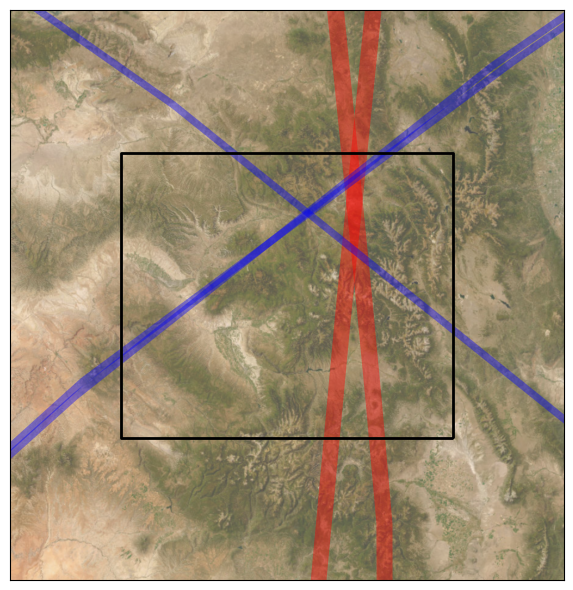

In [66]:
# now let's plot those granule tracks
fig, ax = plt.subplots(figsize=(6, 6))
atl06_granules.plot(ax=ax, color='red', label='ATL06', alpha=0.4)
gedi02_granules.plot(ax=ax, color='blue', label='GEDI02_A', alpha=0.4)
gpd.GeoSeries(shapely_bbox).set_crs(epsg=4326).plot(ax=ax, facecolor='none', linewidth=2)
ax.set_xlim(-110,-105)
ax.set_ylim(37,41)
ctx.add_basemap(ax, crs=4326, source=ctx.providers.Esri.WorldImagery, alpha=0.7, attribution=False)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()

In [71]:
# great! now let's actually pull the elevation data and points from the granules themselves
# I'm going to use the plot extent as the bbox for visualization purposes
extent_box = box(-110,37,-105,41)
extent_coords = [{'lon': lon, 'lat': lat} for lon, lat in shapely_bbox.exterior.coords]
# read more about ATL06 here https://nsidc.org/data/atl06/versions/6
is2_parms = {
            "poly": extent_coords,
            "srt": icesat2.SRT_LAND,
            "cnf": icesat2.CNF_SURFACE_HIGH,
            "ats": 20.0,
            "cnt": 5,
            "len": 40.0,
            "res": 20.0,
            "maxi": 6,
            "t0": start,
            "t1": end
        }
resources = atl06_granules.index.to_list()
print(f"Searching granules: {resources}")
atl06_points = icesat2.atl06sp(is2_parms, resources=resources)
print(f"{len(atl06_points)} ATL06 points returned")
atl06_points.head(5)

Searching granules: ['ATL06_20200405085928_01500706_006_03.h5', 'ATL06_20200406204338_01730702_006_02.h5']
90802 ATL06 points returned


,segment_id,h_robust_sprd,r_eff,bsnow_conf,dh_fit_dx,h_li,bsnow_h,n_fit_photons,sigma_geo_h,rgt,...,atl06_quality_summary,y_atc,w_surface_window_final,tide_ocean,x_atc,spot,h_li_sigma,seg_azimuth,cycle,geometry
time,,,,,,,,,,,,,,,,,,,,,
2020-04-05 09:04:34.374239488,779822,0.572464,0.426600,-1,-0.067527,2883.874268,NaN,50,0.522191,150,...,0,8749.692383,3.434784,NaN,1.561930e+07,6,0.147478,-174.519669,7,POINT (-106.81247 39.99988)
2020-04-05 09:04:34.377056768,779823,0.861316,0.545574,-1,-0.050805,2882.417236,NaN,64,0.523547,150,...,0,8749.715820,6.022295,NaN,1.561932e+07,6,0.170283,-174.519669,7,POINT (-106.81250 39.99970)
2020-04-05 09:04:34.379876352,779824,0.663479,0.725135,-1,0.000032,2882.065918,NaN,83,0.454388,150,...,0,8749.731445,3.980875,NaN,1.561934e+07,6,0.107874,-174.519669,7,POINT (-106.81252 39.99953)
2020-04-05 09:04:34.382697984,779825,0.541178,0.720408,-1,-0.028070,2881.952637,NaN,81,0.460298,150,...,0,8749.746094,3.247067,NaN,1.561936e+07,6,0.081095,-174.519669,7,POINT (-106.81254 39.99935)
2020-04-05 09:04:34.385521152,779826,0.439674,0.705596,-1,-0.056223,2881.191406,NaN,78,0.530161,150,...,0,8749.792969,3.000000,NaN,1.561938e+07,6,0.057510,-174.519669,7,POINT (-106.81256 39.99917)


In [72]:
# notice the quality flag arguemnts below, this is a filter for the quality of the GEDI points (SlideRule already does this for you for ATL06)
# to read more about this, reference Dubayah et. al papers
gedi_parms = {
    "poly": extent_coords,
    "ats": 20.0,
    "cnt": 5,
    "len": 40.0,
    "res": 20.0,
    "maxi": 6,
    "t0": start,
    "t1": end,
    "degrade_flag": 0, 
    "l2_quality_flag": 1
}
resources = gedi02_granules.index.to_list()
print(f"Searching granules: {resources}")
gedi02_points = gedi.gedi02ap(gedi_parms, resources=resources)
print(f"{len(gedi02_points)} GEDI L2A points returned")
gedi02_points.head(5)

Searching granules: ['GEDI02_A_2020093203108_O07402_02_T02817_02_003_01_V002.h5', 'GEDI02_A_2020094024249_O07406_03_T04091_02_003_01_V002.h5', 'GEDI02_A_2020097185916_O07463_02_T01241_02_003_01_V002.h5']
8110 GEDI L2A points returned


,solar_elevation,flags,elevation_hr,beam,elevation_lm,sensitivity,geometry
time,,,,,,,
2020-04-02 21:07:31.951442688,48.854507,130,2030.919312,11,2025.162354,0.931643,POINT (-108.92202 38.64483)
2020-04-02 21:07:31.967970560,48.853458,130,2036.839966,11,2031.232544,0.944844,POINT (-108.92101 38.64548)
2020-04-02 21:07:32.009290752,48.850826,130,2048.998291,11,2044.400146,0.915671,POINT (-108.91849 38.64712)
2020-04-02 21:07:32.042346496,48.848721,130,2060.148926,11,2054.279785,0.904333,POINT (-108.91647 38.64843)
2020-04-02 21:07:34.517581312,48.670799,130,2581.606445,6,2575.589844,0.910851,POINT (-108.75624 38.76753)


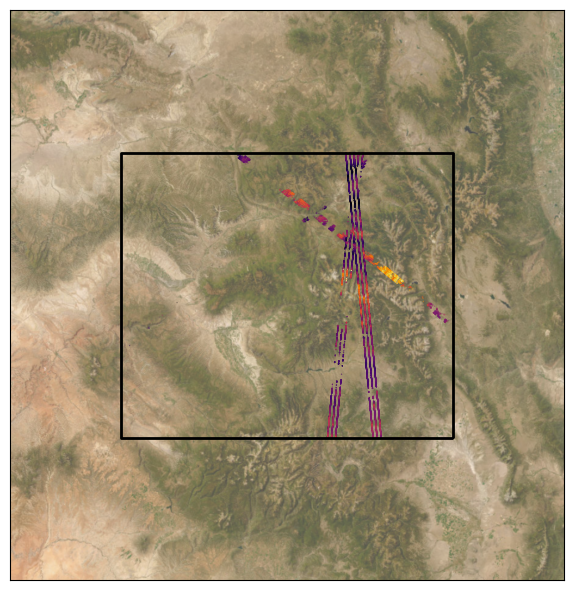

In [73]:
# now let's finally visualize the elevation points
fig, ax = plt.subplots(figsize=(6, 6))
atl06_points.plot(column='h_li', ax=ax, cmap='inferno', alpha=0.2, s=0.7, linewidths=0)
gedi02_points.plot(column='elevation_hr', ax=ax, cmap='inferno', alpha=0.2, s=0.7, linewidths=0)
gpd.GeoSeries(shapely_bbox).set_crs(epsg=4326).plot(ax=ax, facecolor='none', linewidth=2)
ax.set_xlim(-110,-105)
ax.set_ylim(37,41)
ctx.add_basemap(ax, crs=4326, source=ctx.providers.Esri.WorldImagery, alpha=0.7, attribution=False)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()

#### Something went wrong with the plot extent bbox search as seen from the plot, but let's ignore that for now. Notice how some of the expected points to be seen are missing, this is likely due to cloud coverage, poor returns, or filtering. Read up more on the ICESat-2 and GEDI missions to understand that better. 

We successfully pulled both the granules and the points themselves for the area of interest. This is replicable for different areas of interest and time windows. Note that you can pull the points with icesat2.atl06sp and gedi.gedi02ap respectively without the list of granules - just remove the 'resources' argument.